In [2]:
import numpy
import numpy as np
import pandas
import pandas as pd

open_df = pd.read_csv(
  r"C:\Users\wahid\CodeReviewHelper\New-Dataset\All metrics\modeldata-training-and-testing-openSource-senti.csv")
closed_df = pd.read_csv(
  r"C:\Users\wahid\CodeReviewHelper\New-Dataset\All metrics\modeldata-training-and-testing-closedSource-senti.csv")

In [2]:
closed_df

,className,ReadingEase,ReadingEase(NL),StopwordRatio,StopKeyRatio,QuestionRatio,CodeElementRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,c_id,sentimoji,gold
0,u,79.853871,100.000000,0.390244,0.414634,0.000000,0.487805,0.449013,0,0,94,1,5,73,20,0.454948,68087996-7295-u,0.0,0.0
1,u,87.542045,100.000000,0.320000,0.340000,0.000000,0.780000,0.511477,0,0,94,1,5,73,20,0.454948,68088530-7295-u,0.0,0.0
2,u,100.000000,100.000000,0.500000,0.666667,0.000000,0.333333,0.144338,13,1,339,1,16,235,58,0.816139,68088660-7295-u,0.0,0.0
3,u,66.404000,100.000000,0.202899,0.202899,0.500000,0.565217,0.480762,13,1,339,1,16,235,58,0.816139,68089778-7295-u,0.0,0.0
4,u,100.000000,100.000000,0.500000,0.500000,1.000000,0.125000,0.000000,13,1,339,1,16,235,58,0.816139,68089923-7295-u,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,nu,73.540215,88.590238,0.428571,0.428571,0.333333,0.114286,0.202278,0,0,93,1,1,104,15,0.938668,47359198-2441-nu,0.0,-1.0
1081,nu,100.000000,100.000000,0.625000,0.625000,1.000000,0.500000,0.387298,0,0,93,1,1,104,15,0.938668,47359251-2441-nu,0.0,0.0
1082,nu,86.705000,87.945000,0.307692,0.307692,1.000000,0.538462,0.176777,0,0,93,1,1,104,15,0.938668,47359269-2441-nu,0.0,0.0
1083,nu,100.000000,100.000000,0.421053,0.421053,0.000000,0.105263,0.119523,0,0,93,1,1,104,15,0.938668,47359305-2441-nu,0.0,0.0


In [3]:
#merging two dataframe
mergedDf=open_df.append(closed_df)

In [6]:
positive_sentiment_df=mergedDf[mergedDf.gold==1]

In [8]:
negative_sentiment_df=mergedDf[mergedDf.gold==-1]

In [10]:
positive_sentiment_df.to_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\Corpus\positive_sentiment_df.csv",index=False)

In [11]:
negative_sentiment_df.to_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\Corpus\negative_sentiment_df.csv",index=False)

In [9]:
os_sentiment_df=open_df[open_df.gold!=0]
cs_sentiment_df=closed_df[closed_df.gold!=0]

In [12]:
os_sentiment_df.to_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\Corpus\os_sentiment_df.csv",index=False)

In [13]:
cs_sentiment_df.to_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\Corpus\cs_sentiment_df.csv",index=False)

In [5]:
mergedDf.to_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\Corpus\mergedCorpus.csv",index=False)

In [16]:
mergedDf.gold=np.where(mergedDf.gold==-1,1,mergedDf.gold)
mergedDf.className=np.where(mergedDf.className=='u',1,mergedDf.className)
mergedDf.className=np.where(mergedDf.className=='nu',0,mergedDf.className)

In [19]:
#Makiing contagency table for calculating the Tetrachoric Correlation between sentiments and usefulness
#https://www.statology.org/correlation-between-categorical-variables/
sentiUse=0
sentiNonUse=0
neutralUse=0
neutralNonUse=0
for index, row in mergedDf.iterrows():
  if row['gold']==1 and row["className"]== 1  :
    sentiUse=sentiUse+1
  elif row['gold']==1 and row["className"]== 0 :
    sentiNonUse=sentiNonUse+1
  elif  row['gold']==0 and row["className"]== 1 :
    neutralUse=neutralUse+1
  elif  row['gold']==0 and row["className"]== 0 :
    neutralNonUse=neutralNonUse+1
print(f'{sentiUse} and {sentiNonUse} and {neutralUse} and {neutralNonUse}')


157 and 278 and 1131 and 617


In [3]:
#Merging project information in the dataframe
import os

base = r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\repo-pr-list"
files = os.listdir(base)
for file in files:
  if file.startswith('elasticsearch'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      elastic_pr = f.readlines()
      elastic_pr = [x.strip('\n') for x in elastic_pr]
  if file.startswith('keras'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      keras_pr = f.readlines()
      keras_pr = [x.strip('\n') for x in keras_pr]
  if file.startswith('leakcanary'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      leak_pr = f.readlines()
      leak_pr = [x.strip('\n') for x in leak_pr]
  if file.startswith('meteor'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      meteor_pr = f.readlines()
      meteor_pr = [x.strip('\n') for x in meteor_pr]
  if file.startswith('numpy'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      numpy_pr = f.readlines()
      numpy_pr = [x.strip('\n') for x in numpy_pr]
  if file.startswith('polymer'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      polymer_pr = f.readlines()
      polymer_pr = [x.strip('\n') for x in polymer_pr]


In [4]:
#Merging project information in the dataframe
project_list = []
for index, row in open_df.iterrows():
  pr = row['c_id'].split('-')
  if pr[1] in elastic_pr:
    project_list.append('elasticsearch')
  elif pr[1] in keras_pr:
    project_list.append('keras')
  elif pr[1] in leak_pr:
    project_list.append('leakcanary')
  elif pr[1] in numpy_pr:
    project_list.append('numpy')
  elif pr[1] in meteor_pr:
    project_list.append('meteor')
  elif pr[1] in polymer_pr:
    project_list.append('polymer')

open_df['project'] = project_list

In [5]:
#Merging project information in the dataframe
import os

base = r"C:\Users\wahid\RevHelper-Replication\src\experiment\experiment-analysis\codereview\All-corpus"
files = os.listdir(base)
for file in files:
  if file.startswith('CS'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      cs_lines = f.readlines()
      cs_pr = []
      for item in cs_lines:
        temp = item.split('-')
        cs_pr.append(temp[1])
  if file.startswith('MS'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      ms_lines = f.readlines()
      ms_pr = []
      for item in ms_lines:
        temp = item.split('-')
        ms_pr.append(temp[1])
  if file.startswith('SM'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      sm_lines = f.readlines()
      sm_pr = []
      for item in sm_lines:
        temp = item.split('-')
        sm_pr.append(temp[1])
  if file.startswith('SR'):
    with open(os.path.join(base, file), 'r', encoding='utf-8') as f:
      sr_lines = f.readlines()
      sr_pr = []
      for item in sr_lines:
        temp = item.split('-')
        sr_pr.append(temp[1])

In [6]:
#Merging project information in the dataframe
project_list = []
for index, row in closed_df.iterrows():
  pr = row['c_id'].split('-')
  if pr[1] in cs_pr:
    project_list.append('cs')
  elif pr[1] in sm_pr:
    project_list.append('sm')
  elif pr[1] in ms_pr:
    project_list.append('ms')
  elif pr[1] in sr_pr:
    project_list.append('sr')

closed_df['project'] = project_list

In [54]:
open_df.std()

C:\Users\wahid\AppData\Local\Temp/ipykernel_7424/3463739603.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  open_df.std()


ReadingEase                20.626296
ReadingEase(NL)            17.463111
CodeElementRatio            0.187969
QuestionRatio               0.358494
StopwordRatio               0.138823
StopKeyRatio                0.139211
ConceptualSimilarity        0.129764
AuthorCommitsFile          40.603863
CommittedTwice              0.493907
TotalAuthoredCommits      808.383232
ReviewingTwice              0.487720
ReviewedCommitsFile        58.483347
TotalReviewedCommits    17532.088582
ReviewedPRs              7286.953556
ExtLibSimilarity            0.304180
sentimoji                   0.410043
gold                        0.440237
dtype: float64

In [55]:
closed_df.std()

C:\Users\wahid\AppData\Local\Temp/ipykernel_7424/3452991977.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  closed_df.std()


ReadingEase              22.159074
ReadingEase(NL)          19.190581
StopwordRatio             0.173088
StopKeyRatio              0.173463
QuestionRatio             0.387083
CodeElementRatio          0.252240
ConceptualSimilarity      0.164408
AuthorCommitsFile         9.299995
CommittedTwice            0.499439
TotalAuthoredCommits    923.870038
ReviewingTwice            0.343377
ReviewedCommitsFile      19.913911
TotalReviewedCommits    713.548397
ReviewedPRs             127.058550
ExtLibSimilarity          0.356542
sentimoji                 0.380078
gold                      0.435928
dtype: float64

In [7]:
#Mergin Text Data to the open-source dataframe
open = pd.read_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Goldset\open-source-corpus-uid-trimmed.csv")
ids = []
for index, row in open_df.iterrows():
  temp = row['c_id'].split('-')
  ids.append(temp[0] + '-' + temp[1])
open_df.insert(2, "id", ids, True)
new_open_df = (pd.merge(open_df, open, on=['id', "gold"]))
new_open_df

,c_id,className,id,ReadingEase,ReadingEase(NL),CodeElementRatio,QuestionRatio,StopwordRatio,StopKeyRatio,ConceptualSimilarity,...,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji,gold,project,text
0,747530042-80665-u,u,747530042-80665,66.965000,86.168161,0.058824,0.333333,0.529412,0.529412,0.115953,...,1366,1,6,63184,26263,0.571652,0,0,elasticsearch,What do you think of auditing a failure to sto...
1,747351710-80624-u,u,747351710-80624,68.066184,98.678088,0.200000,0.500000,0.480000,0.520000,0.145454,...,5088,1,35,63159,26243,0.000000,0,0,elasticsearch,I think the `resolveRouting(...)` method can n...
2,747405594-80624-u,u,747405594-80624,72.615455,100.000000,0.400000,1.000000,0.400000,0.400000,0.200000,...,61,1,35,63159,26243,0.000000,0,0,elasticsearch,Why not add `DocWriteRequest.process()` too to...
3,746889403-80617-u,u,746889403-80617,52.265000,67.530000,0.200000,0.000000,0.500000,0.500000,0.271148,...,1,1,21,63157,26241,0.000000,0,0,elasticsearch,We should actually just replace this with `ver...
4,746889665-80617-u,u,746889665-80617,76.321923,79.940000,0.071429,0.000000,0.500000,0.500000,0.000000,...,1,1,35,63157,26241,0.000000,0,0,elasticsearch,If we leverage `versions` in the reference bui...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,522205084-1535-nu,nu,522205084-1535,92.002644,92.002644,0.029412,0.333333,0.294118,0.294118,0.000000,...,124,0,0,646,465,0.000000,1,1,leakcanary,Thanks! How do I generate / override the ba...
1116,316832957-1535-nu,nu,316832957-1535,100.000000,100.000000,0.200000,1.000000,0.600000,0.600000,0.000000,...,124,0,0,646,465,0.000000,0,0,leakcanary,do we need empty files?
1117,316917131-1535-nu,nu,316917131-1535,100.000000,100.000000,0.200000,0.000000,0.666667,0.666667,0.000000,...,124,0,0,646,465,0.500000,0,0,leakcanary,with that we can get rid of the vararg and los...
1118,524360847-1535-nu,nu,524360847-1535,100.000000,100.000000,0.125000,0.333333,0.333333,0.333333,0.000000,...,124,0,0,646,465,0.000000,0,1,leakcanary,I like the stats reports per module! Let's kee...


In [67]:
dfs = [x for _, x in new_open_df.groupby('project')]


In [91]:
repo = "polymer"
dfs[5].to_csv("C:\\Users\wahid\PycharmProjects\Replication-Study\Goldset\project-wise-data\\" + repo + ".csv",
              index=False)

In [93]:
dfs[6]['project']

IndexError: list index out of range

In [101]:
#Mergin Text Data to the closed-source dataframe
closed = pd.read_csv(r"C:\Users\wahid\PycharmProjects\Replication-Study\Goldset\closed-source-corpus-uid-trimmed.csv")
ids = []
for index, row in closed_df.iterrows():
  temp = row['c_id'].split('-')
  ids.append(temp[0] + '-' + temp[1])
closed_df.insert(2, "id", ids, True)
new_closed_df = (pd.merge(closed_df, closed, on=['id', "gold"]))
new_closed_df

,className,ReadingEase,id,ReadingEase(NL),StopwordRatio,StopKeyRatio,QuestionRatio,CodeElementRatio,ConceptualSimilarity,AuthorCommitsFile,...,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,c_id,sentimoji,gold,project,text
0,u,79.853871,68087996-7295,100.000000,0.390244,0.414634,0.000000,0.487805,0.449013,0,...,1,5,73,20,0.454948,68087996-7295-u,0.0,0.0,cs,I'm not sure you need to do `len(location) > 0...
1,u,87.542045,68088530-7295,100.000000,0.320000,0.340000,0.000000,0.780000,0.511477,0,...,1,5,73,20,0.454948,68088530-7295-u,0.0,0.0,cs,I think here you could write ``` if location:...
2,u,100.000000,68088660-7295,100.000000,0.500000,0.666667,0.000000,0.333333,0.144338,13,...,1,16,235,58,0.816139,68088660-7295-u,0.0,0.0,cs,This could be an `elif`.
3,u,66.404000,68089778-7295,100.000000,0.202899,0.202899,0.500000,0.565217,0.480762,13,...,1,16,235,58,0.816139,68089778-7295-u,0.0,0.0,cs,I think this could be made more generic to the...
4,u,100.000000,68089923-7295,100.000000,0.500000,0.500000,1.000000,0.125000,0.000000,13,...,1,16,235,58,0.816139,68089923-7295-u,0.0,0.0,cs,Do you want a space after the comma?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,nu,73.540215,47359198-2441,88.590238,0.428571,0.428571,0.333333,0.114286,0.202278,0,...,1,1,104,15,0.938668,47359198-2441-nu,0.0,-1.0,sr,I think this is incorrect. The account needs t...
1087,nu,100.000000,47359251-2441,100.000000,0.625000,0.625000,1.000000,0.500000,0.387298,0,...,1,1,104,15,0.938668,47359251-2441-nu,0.0,0.0,sr,Why not just use `self.help_tag`?
1088,nu,86.705000,47359269-2441,87.945000,0.307692,0.307692,1.000000,0.538462,0.176777,0,...,1,1,104,15,0.938668,47359269-2441-nu,0.0,0.0,sr,Why is this called `help_tag` but named `ADVIC...
1089,nu,100.000000,47359305-2441,100.000000,0.421053,0.421053,0.000000,0.105263,0.119523,0,...,1,1,104,15,0.938668,47359305-2441-nu,0.0,0.0,sr,I don't think there is a reason to use `list()...


In [102]:
dfs = [x for _, x in new_closed_df.groupby('project')]

In [111]:
repo = "sr"
dfs[3].to_csv("C:\\Users\wahid\PycharmProjects\Replication-Study\Goldset\project-wise-data\\" + repo + ".csv",
              index=False)

In [110]:
dfs[3]['project']

477     sr
478     sr
479     sr
480     sr
481     sr
        ..
1086    sr
1087    sr
1088    sr
1089    sr
1090    sr
Name: project, Length: 286, dtype: object

In [6]:
open_df = open_df.drop(
  ["c_id", 'className', 'ReadingEase', 'ReadingEase(NL)', 'CodeElementRatio', 'QuestionRatio', 'StopwordRatio',
   'StopKeyRatio'], axis=1)
closed_df = closed_df.drop(
  ["c_id", 'className', 'ReadingEase', 'ReadingEase(NL)', 'CodeElementRatio', 'QuestionRatio', 'StopwordRatio',
   'StopKeyRatio'], axis=1)

In [8]:
lang_group = {'ja': ['elasticsearch', 'leakcanary'], 'js': ['meteor', 'polymer'], 'py': ['keras', 'numpy'], }
lang_of = {project: lang for lang, projects in lang_group.items() for project in projects}

lang_wise_mean = {lang: open_df[open_df.project.isin(projects)].std() for lang, projects in lang_group.items()}
project_wise_mean = open_df.groupby('project').std()


def compute_distance(project_mean_df: pd.Series):
  assert isinstance(project_mean_df, pd.Series)
  project_name = project_mean_df.name
  project_mean_dict = project_mean_df.to_dict()
  project_distance_dict = {field: {
    lang if lang_of[project_name] != lang else 'self': round(project_mean_dict[field] - lang_wise_mean[lang][field], 2)
    for lang, lang_mean in lang_wise_mean.items()} for field in project_mean_dict.keys()}

  return pd.Series(project_distance_dict)


open_project_diff = project_wise_mean.apply(compute_distance, axis=1)
open_project_diff

C:\Users\wahid\AppData\Local\Temp/ipykernel_18336/1304017309.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lang: open_df[open_df.project.isin(projects)].std()


,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji,gold
project,,,,,,,,,,,
elasticsearch,"{'self': 0.01, 'js': -0.01, 'py': -0.01}","{'self': -0.69, 'js': 2.88, 'py': -58.96}","{'self': 0.0, 'js': 0.06, 'py': 0.0}","{'self': 563.12, 'js': 1121.95, 'py': 970.71}","{'self': -0.01, 'js': 0.04, 'py': -0.0}","{'self': 6.38, 'js': -48.39, 'py': -56.52}","{'self': -27352.14, 'js': -2393.17, 'py': -472...","{'self': -11476.79, 'js': -534.02, 'py': -2102...","{'self': -0.09, 'js': -0.1, 'py': 0.16}","{'self': 0.01, 'js': 0.08, 'py': -0.03}","{'self': 0.02, 'js': 0.1, 'py': 0.0}"
keras,"{'ja': 0.03, 'js': 0.01, 'self': 0.01}","{'ja': 82.27, 'js': 85.84, 'self': 24.0}","{'ja': -0.02, 'js': 0.04, 'self': -0.02}","{'ja': -845.93, 'js': -287.1, 'self': -438.34}","{'ja': -0.03, 'js': 0.02, 'self': -0.02}","{'ja': 67.21, 'js': 12.44, 'self': 4.31}","{'ja': -26277.89, 'js': -1318.91, 'self': -365...","{'ja': -10349.82, 'js': 592.95, 'self': -976.0}","{'ja': -0.22, 'js': -0.22, 'self': 0.04}","{'ja': -0.05, 'js': 0.02, 'self': -0.1}","{'ja': -0.05, 'js': 0.03, 'self': -0.07}"
leakcanary,"{'self': -0.01, 'js': -0.03, 'py': -0.03}","{'self': 0.24, 'js': 3.82, 'py': -58.03}","{'self': 0.0, 'js': 0.05, 'py': -0.0}","{'self': -1055.84, 'js': -497.01, 'py': -648.25}","{'self': -0.0, 'js': 0.05, 'py': 0.01}","{'self': -6.11, 'js': -60.88, 'py': -69.01}","{'self': -28211.27, 'js': -3252.3, 'py': -5586...","{'self': -11512.63, 'js': -569.86, 'py': -2138...","{'self': 0.0, 'js': 0.0, 'py': 0.26}","{'self': -0.01, 'js': 0.06, 'py': -0.05}","{'self': -0.01, 'js': 0.07, 'py': -0.03}"
meteor,"{'ja': -0.01, 'self': -0.04, 'py': -0.03}","{'ja': -3.3, 'self': 0.28, 'py': -61.57}","{'ja': -0.04, 'self': 0.01, 'py': -0.05}","{'ja': -937.73, 'self': -378.91, 'py': -530.14}","{'ja': -0.0, 'self': 0.05, 'py': 0.01}","{'ja': 88.52, 'self': 33.75, 'py': 25.62}","{'ja': -24819.18, 'self': 139.79, 'py': -2194.65}","{'ja': -10872.31, 'self': 70.45, 'py': -1498.5}","{'ja': -0.09, 'self': -0.09, 'py': 0.16}","{'ja': 0.02, 'self': 0.08, 'py': -0.03}","{'ja': 0.01, 'self': 0.09, 'py': -0.01}"
numpy,"{'ja': -0.0, 'js': -0.03, 'self': -0.02}","{'ja': 19.05, 'js': 22.63, 'self': -39.22}","{'ja': -0.0, 'js': 0.05, 'self': -0.01}","{'ja': -264.27, 'js': 294.56, 'self': 143.32}","{'ja': -0.0, 'js': 0.05, 'self': 0.01}","{'ja': 59.2, 'js': 4.43, 'self': -3.7}","{'ja': -24550.15, 'js': 408.83, 'self': -1925.62}","{'ja': -9983.82, 'js': 958.95, 'self': -610.0}","{'ja': -0.3, 'js': -0.31, 'self': -0.05}","{'ja': 0.11, 'js': 0.17, 'self': 0.06}","{'ja': 0.07, 'js': 0.15, 'self': 0.05}"
polymer,"{'ja': 0.04, 'self': 0.01, 'py': 0.01}","{'ja': -3.77, 'self': -0.2, 'py': -62.04}","{'ja': -0.06, 'self': -0.01, 'py': -0.06}","{'ja': -546.36, 'self': 12.46, 'py': -138.77}","{'ja': -0.12, 'self': -0.07, 'py': -0.11}","{'ja': 9.58, 'self': -45.19, 'py': -53.33}","{'ja': -27310.7, 'self': -2351.73, 'py': -4686...","{'ja': -11368.41, 'self': -425.64, 'py': -1994...","{'ja': 0.04, 'self': 0.04, 'py': 0.3}","{'ja': -0.14, 'self': -0.08, 'py': -0.19}","{'ja': -0.17, 'self': -0.09, 'py': -0.19}"


In [10]:
print(f'{lang_wise_mean["ja"]["ReviewedCommitsFile"] - lang_wise_mean["js"]["ReviewedCommitsFile"]=}')
print(f'{lang_wise_mean["ja"]["ReviewedCommitsFile"] - lang_wise_mean["py"]["ReviewedCommitsFile"]=}')

lang_wise_mean["ja"]["ReviewedCommitsFile"] - lang_wise_mean["js"]["ReviewedCommitsFile"]=-54.76820622446887
lang_wise_mean["ja"]["ReviewedCommitsFile"] - lang_wise_mean["py"]["ReviewedCommitsFile"]=-62.901558439378775


In [113]:
def compute_distance(project_mean_df: pd.Series):
  assert isinstance(project_mean_df, pd.Series)
  project_name = project_mean_df.name
  project_mean_dict = project_mean_df.to_dict()
  project_distance_dict = {}

  # project_distance_dict = {
  #   field: {
  #     lang if lang_of[project_name] != lang else 'self': round(project_mean_dict[field] - lang_wise_mean[lang][field], 2)
  #     for lang, lang_mean in lang_wise_mean.items()
  #   }
  #   for field in project_mean_dict.keys()
  # }

  for field in project_mean_dict.keys():
    field_values = {}
    for lang, lang_mean in lang_wise_mean.items():
      kw = 'self' if lang_of[project_name] == lang else lang
      if kw != 'self':
        value = project_mean_dict[field] - lang_wise_mean[lang][field]
      else:
        projects_of_same_lang = lang_group[lang]
        other_project = [project for project in projects_of_same_lang if project != project_name][0]

        value = project_wise_mean.loc[other_project][field]

      field_values[kw] = round(value, 2)
    project_distance_dict[field] = field_values

  return pd.Series(project_distance_dict)


open_project_diff = project_wise_mean.apply(compute_distance, axis=1)
open_project_diff

,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji,gold
project,,,,,,,,,,,
elasticsearch,"{'self': 0.06, 'js': -0.02, 'py': -0.0}","{'self': 4.21, 'js': 1.79, 'py': -23.14}","{'self': 0.46, 'js': 0.2, 'py': -0.04}","{'self': 103.11, 'js': 1093.29, 'py': 880.37}","{'self': 0.47, 'js': -0.11, 'py': 0.01}","{'self': 2.11, 'js': -10.18, 'py': -30.03}","{'self': 762.8, 'js': 57898.47, 'py': 53467.91}","{'self': 546.78, 'js': 24920.18, 'py': 21610.58}","{'self': 0.37, 'js': -0.11, 'py': 0.08}","{'self': 0.09, 'js': 0.01, 'py': -0.01}","{'self': 0.13, 'js': -0.02, 'py': -0.06}"
keras,"{'ja': 0.09, 'js': 0.04, 'self': 0.07}","{'ja': 45.43, 'js': 48.12, 'self': 8.15}","{'ja': 0.17, 'js': 0.37, 'self': 0.42}","{'ja': -153.13, 'js': -58.6, 'self': 838.32}","{'ja': 0.16, 'js': -0.04, 'self': 0.54}","{'ja': 41.0, 'js': 25.88, 'self': 34.44}","{'ja': -14469.09, 'js': -1027.86, 'self': 1407...","{'ja': -5317.88, 'js': 1387.55, 'self': 6054.46}","{'ja': -0.26, 'js': -0.18, 'self': 0.0}","{'ja': 0.01, 'js': 0.0, 'self': 0.14}","{'ja': 0.0, 'js': 0.02, 'self': 0.15}"
leakcanary,"{'self': 0.11, 'js': -0.07, 'py': -0.05}","{'self': 2.95, 'js': 3.05, 'py': -21.88}","{'self': 0.48, 'js': 0.19, 'py': -0.05}","{'self': 1508.49, 'js': -312.08, 'py': -525.0}","{'self': 0.61, 'js': -0.24, 'py': -0.13}","{'self': 9.08, 'js': -17.14, 'py': -37.0}","{'self': 63319.21, 'js': -4657.95, 'py': -9088...","{'self': 26177.01, 'js': -710.05, 'py': -4019.65}","{'self': 0.1, 'js': 0.16, 'py': 0.35}","{'self': 0.12, 'js': -0.01, 'py': -0.03}","{'self': 0.08, 'js': 0.03, 'py': -0.01}"
meteor,"{'ja': 0.01, 'self': 0.16, 'py': -0.03}","{'ja': -2.71, 'self': 1.17, 'py': -24.96}","{'ja': -0.18, 'self': 0.26, 'py': -0.23}","{'ja': -474.25, 'self': 674.9, 'py': -592.64}","{'ja': 0.04, 'self': 0.83, 'py': -0.05}","{'ja': 21.8, 'self': 14.69, 'py': -13.18}","{'ja': -10487.52, 'self': 3400.52, 'py': -1476...","{'ja': -6160.52, 'self': 884.13, 'py': -2764.68}","{'ja': -0.17, 'self': 0.27, 'py': 0.1}","{'ja': 0.07, 'self': 0.06, 'py': 0.05}","{'ja': 0.06, 'self': 0.05, 'py': 0.04}"
numpy,"{'ja': -0.0, 'js': -0.06, 'self': 0.16}","{'ja': 4.3, 'js': 6.99, 'self': 49.27}","{'ja': -0.04, 'js': 0.15, 'self': 0.64}","{'ja': 328.6, 'js': 423.13, 'self': 356.6}","{'ja': 0.03, 'js': -0.17, 'self': 0.68}","{'ja': 30.32, 'js': 15.19, 'self': 45.13}","{'ja': -4784.82, 'js': 8656.42, 'self': 4392.89}","{'ja': -1907.81, 'js': 4797.62, 'self': 2644.39}","{'ja': -0.29, 'js': -0.2, 'self': 0.03}","{'ja': 0.04, 'js': 0.04, 'self': 0.11}","{'ja': 0.04, 'js': 0.05, 'self': 0.12}"
polymer,"{'ja': 0.09, 'self': 0.08, 'py': 0.05}","{'ja': -2.67, 'self': 1.13, 'py': -24.92}","{'ja': -0.21, 'self': 0.29, 'py': -0.26}","{'ja': 165.18, 'self': 35.48, 'py': 46.79}","{'ja': 0.32, 'self': 0.55, 'py': 0.23}","{'ja': 10.56, 'self': 25.93, 'py': -24.42}","{'ja': -15461.47, 'self': 8374.46, 'py': -6450...","{'ja': -7078.13, 'self': 1801.74, 'py': -3682.29}","{'ja': -0.02, 'self': 0.12, 'py': 0.25}","{'ja': -0.04, 'self': 0.17, 'py': -0.07}","{'ja': -0.07, 'self': 0.18, 'py': -0.09}"


In [79]:
open_df.groupby('project').std()

,ReadingEase,ReadingEase(NL),CodeElementRatio,QuestionRatio,StopwordRatio,StopKeyRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji,gold
project,,,,,,,,,,,,,,,,,
elasticsearch,19.589670,15.975868,0.190290,0.387586,0.126845,0.131477,0.121315,6.493403,0.501853,1657.506046,0.489758,15.956859,1060.139351,162.392740,0.249225,0.427050,0.478751
keras,21.396900,21.638607,0.198258,0.273441,0.141024,0.141105,0.143417,89.453009,0.482330,248.455354,0.468421,76.782963,2134.398966,1289.364848,0.121119,0.363544,0.406674
leakcanary,21.546750,17.663486,0.183688,0.381900,0.139017,0.138232,0.103777,7.429002,0.499576,38.545217,0.500329,3.463472,201.009681,126.556995,0.344775,0.406901,0.448523
meteor,15.396611,12.797480,0.176726,0.324733,0.146049,0.147761,0.099188,3.889543,0.455175,156.652042,0.499041,98.092760,3593.104125,766.870822,0.249354,0.430517,0.466502
numpy,16.877756,15.825743,0.203553,0.307025,0.143369,0.141490,0.109612,26.238338,0.495327,830.115876,0.499231,68.776124,3862.137943,1655.367993,0.038032,0.520734,0.526965
polymer,24.568913,18.256575,0.173093,0.409174,0.129466,0.131558,0.148417,3.413482,0.439362,548.022455,0.376356,19.150619,1101.583950,270.780426,0.384923,0.269463,0.288223


In [41]:
closed_df

,className,ReadingEase,ReadingEase(NL),StopwordRatio,StopKeyRatio,QuestionRatio,CodeElementRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,c_id,sentimoji,gold,project
0,u,79.853871,100.000000,0.390244,0.414634,0.000000,0.487805,0.449013,0,0,94,1,5,73,20,0.454948,68087996-7295-u,0.0,0.0,cs
1,u,87.542045,100.000000,0.320000,0.340000,0.000000,0.780000,0.511477,0,0,94,1,5,73,20,0.454948,68088530-7295-u,0.0,0.0,cs
2,u,100.000000,100.000000,0.500000,0.666667,0.000000,0.333333,0.144338,13,1,339,1,16,235,58,0.816139,68088660-7295-u,0.0,0.0,cs
3,u,66.404000,100.000000,0.202899,0.202899,0.500000,0.565217,0.480762,13,1,339,1,16,235,58,0.816139,68089778-7295-u,0.0,0.0,cs
4,u,100.000000,100.000000,0.500000,0.500000,1.000000,0.125000,0.000000,13,1,339,1,16,235,58,0.816139,68089923-7295-u,0.0,0.0,cs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,nu,73.540215,88.590238,0.428571,0.428571,0.333333,0.114286,0.202278,0,0,93,1,1,104,15,0.938668,47359198-2441-nu,0.0,-1.0,sr
1081,nu,100.000000,100.000000,0.625000,0.625000,1.000000,0.500000,0.387298,0,0,93,1,1,104,15,0.938668,47359251-2441-nu,0.0,0.0,sr
1082,nu,86.705000,87.945000,0.307692,0.307692,1.000000,0.538462,0.176777,0,0,93,1,1,104,15,0.938668,47359269-2441-nu,0.0,0.0,sr
1083,nu,100.000000,100.000000,0.421053,0.421053,0.000000,0.105263,0.119523,0,0,93,1,1,104,15,0.938668,47359305-2441-nu,0.0,0.0,sr


In [99]:
closed_df.head(5)

,className,ReadingEase,ReadingEase(NL),StopwordRatio,StopKeyRatio,QuestionRatio,CodeElementRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji
0,u,79.853871,100.0,0.390244,0.414634,0.0,0.487805,0.449013,0,0,94,1,5,73,20,0.454948,0.0
1,u,87.542045,100.0,0.320000,0.340000,0.0,0.780000,0.511477,0,0,94,1,5,73,20,0.454948,0.0
2,u,100.000000,100.0,0.500000,0.666667,0.0,0.333333,0.144338,13,1,339,1,16,235,58,0.816139,0.0
3,u,66.404000,100.0,0.202899,0.202899,0.5,0.565217,0.480762,13,1,339,1,16,235,58,0.816139,0.0
4,u,100.000000,100.0,0.500000,0.500000,1.0,0.125000,0.000000,13,1,339,1,16,235,58,0.816139,0.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()


In [72]:
def draw_kdeplot(col: str, clip=None, sharex=True, sharey=True):
  fig, axes = plt.subplots(1, 2, sharex=sharex, sharey=sharey, gridspec_kw={'wspace': .05}, figsize=(15, 5))
  sns.kdeplot(x=open_df[col], hue=open_df['className'], clip=clip, ax=axes[0], )

  axes[0].set_title('Open Source')
  sns.kdeplot(x=closed_df[col], hue=closed_df['className'], clip=clip, ax=axes[1], )
  axes[1].set_title('Closed Source')

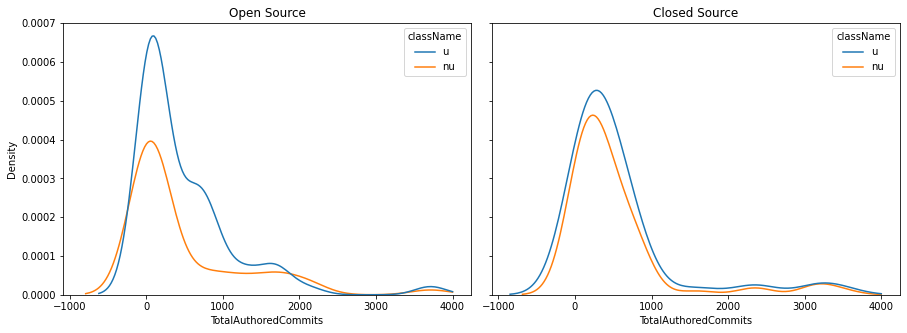

In [73]:
# TODO: further investigate
draw_kdeplot('TotalAuthoredCommits', clip=(-1000, 4000))

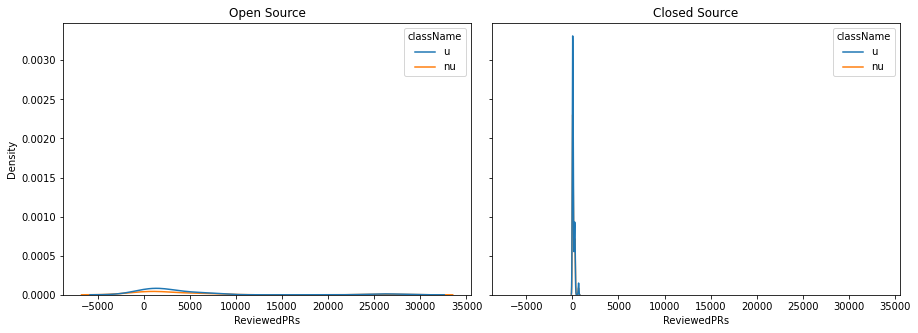

In [70]:
draw_kdeplot('ReviewedPRs')

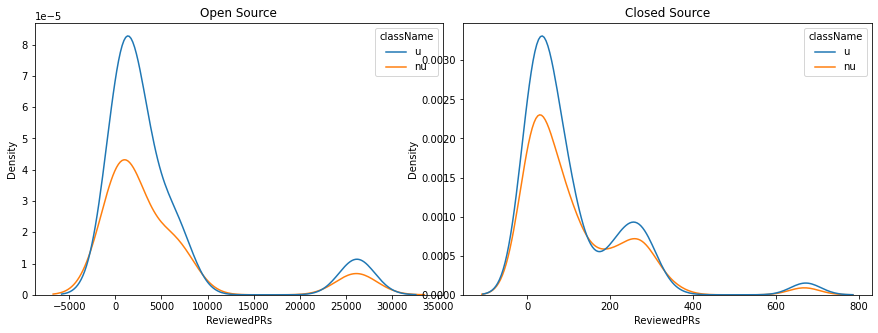

In [75]:
draw_kdeplot('ReviewedPRs', sharey=False, sharex=False)

In [ ]:
draw_kdeplot('TotalReviewedCommits')

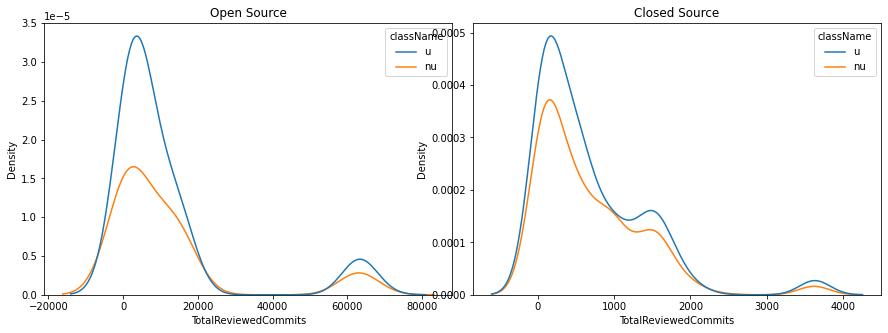

In [76]:
draw_kdeplot('TotalReviewedCommits', sharex=False, sharey=False)

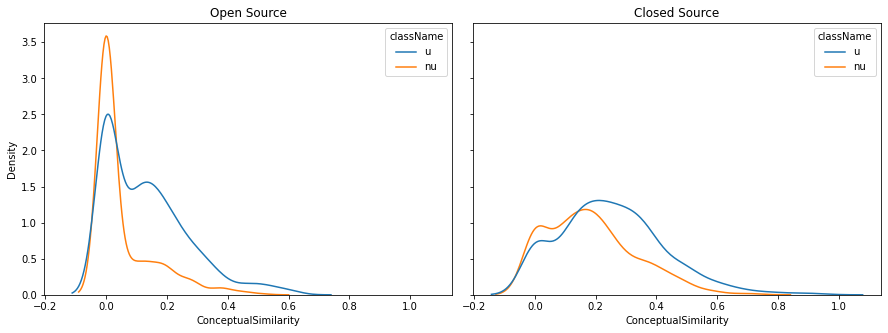

In [63]:
draw_kdeplot('ConceptualSimilarity')

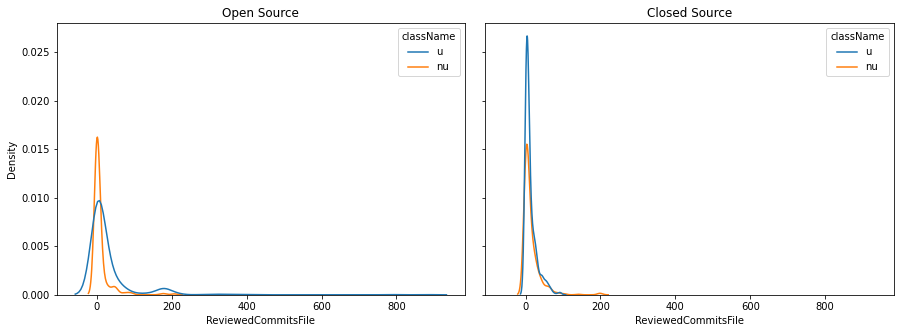

In [64]:
draw_kdeplot('ReviewedCommitsFile')

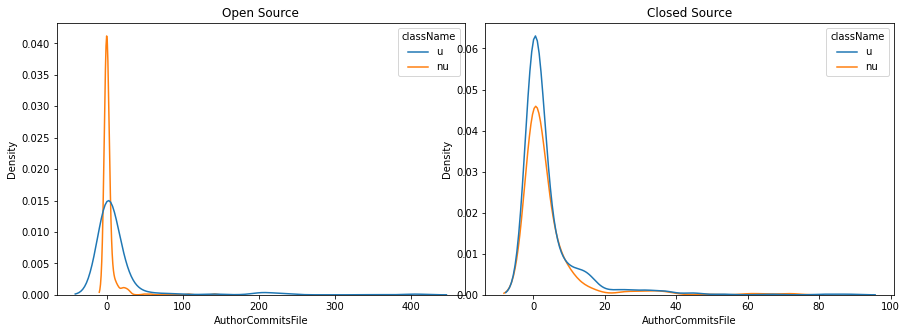

In [92]:
draw_kdeplot('AuthorCommitsFile', sharex=False, sharey=False)

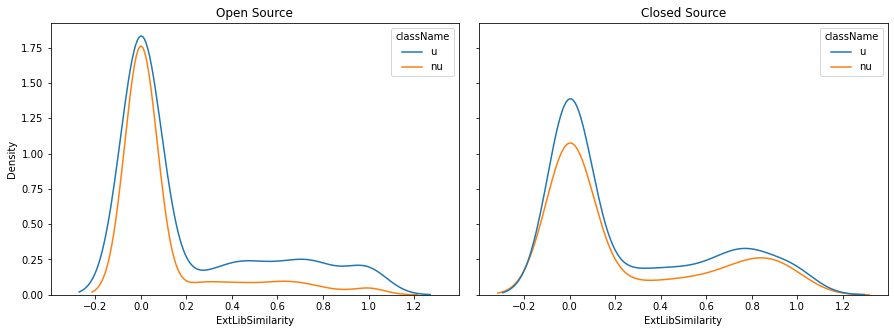

In [66]:
draw_kdeplot('ExtLibSimilarity')

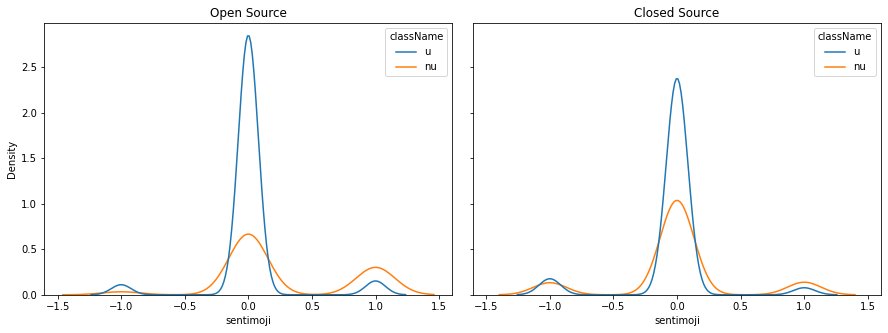

In [67]:
draw_kdeplot('sentimoji')

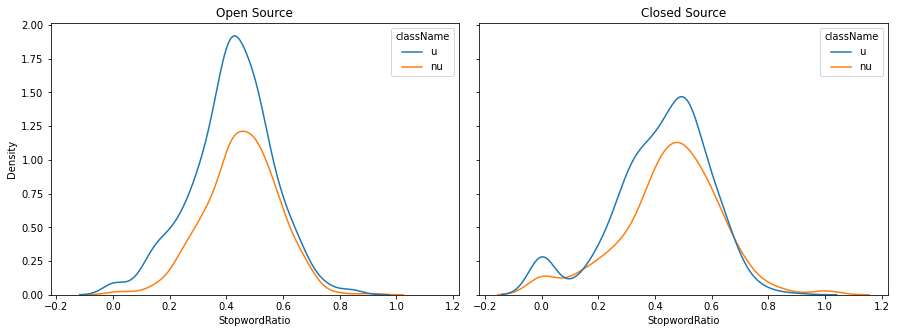

In [69]:
draw_kdeplot('StopwordRatio')

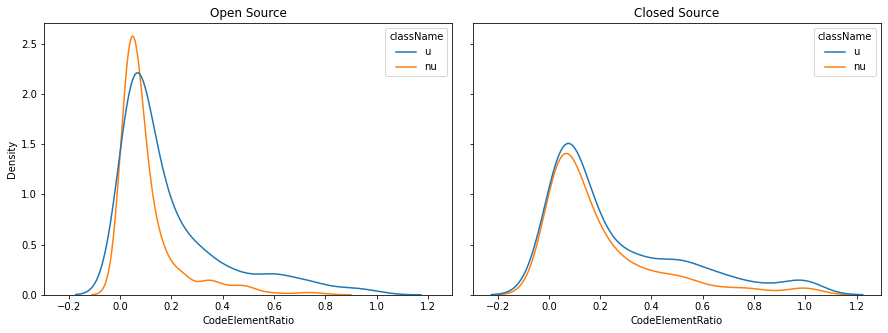

In [79]:
draw_kdeplot('CodeElementRatio')

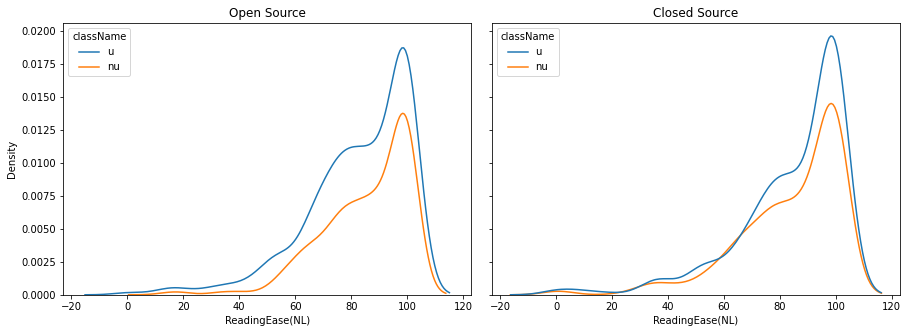

In [81]:
draw_kdeplot('ReadingEase(NL)')

## Analyse Goldset

In [82]:
open_df['TotalAuthoredCommits'][open_df.className == 'u'].describe()

count     676.000000
mean      520.958580
std       759.080126
min         0.000000
25%        76.000000
50%       124.000000
75%       799.000000
max      5088.000000
Name: TotalAuthoredCommits, dtype: float64

In [83]:
open_df['TotalAuthoredCommits'][open_df.className == 'nu'].describe()

count     422.000000
mean      519.763033
std       882.576384
min         0.000000
25%         2.000000
50%       124.000000
75%       799.000000
max      5088.000000
Name: TotalAuthoredCommits, dtype: float64

In [84]:
closed_df['TotalAuthoredCommits'][closed_df.className == 'u'].describe()

count     612.000000
mean      628.727124
std      1018.303113
min         0.000000
25%       145.000000
50%       339.000000
75%       641.000000
max      7098.000000
Name: TotalAuthoredCommits, dtype: float64

In [85]:
closed_df['TotalAuthoredCommits'][closed_df.className == 'nu'].describe()

count     473.000000
mean      535.769556
std       782.970676
min         0.000000
25%       111.000000
50%       324.000000
75%       610.000000
max      7098.000000
Name: TotalAuthoredCommits, dtype: float64

In [86]:
from scipy.stats import expon

In [89]:
expon.fit(open_df['TotalAuthoredCommits'][open_df.className == 'u'])

(0.0, 520.9585798816568)

In [90]:
expon.fit(open_df['TotalAuthoredCommits'][open_df.className == 'nu'])

(0.0, 519.7630331753554)

<AxesSubplot:xlabel='ReviewedPRs', ylabel='Density'>

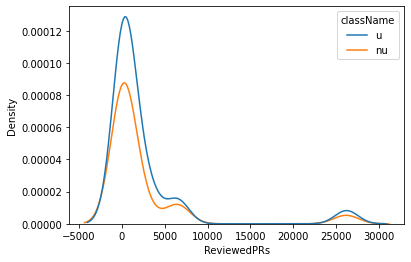

In [98]:
merged = pd.concat([open_df, closed_df], ignore_index=True)
sns.kdeplot(x=merged['ReviewedPRs'], hue=merged['className'], )

In [3]:
#Manual investigation of RQ1
open_df = pd.read_csv(
  r"C:\Users\wahid\CodeReviewHelper\New-Dataset\All metrics\modeldata-training-and-testing-openSource-senti.csv")
closed_df = pd.read_csv(
  r"C:\Users\wahid\CodeReviewHelper\New-Dataset\All metrics\modeldata-training-and-testing-closedSource-senti.csv")

In [4]:
#Calculating the change file for each project
import json

with open(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\CORRECT-VENDASTA\Open Source\Json\\polymer.json") as f:
  data = json.load(f)
change_file_list = []
for i in range(len(data)):
  change_file_list.append(data[i]['file'])
print(len(list((set(change_file_list)))))

249


In [34]:
#Calculating Normalized document level reviewing experience for open-source subject systems
import os

norm_file_review_open = []
norm_file_review_class = []
norm_file_review_sentiment = []
norm_file_review_open_df = pd.DataFrame(columns=['className', 'reviewedCommitsFile', 'normalizedFileExp', 'gold'])
elastic_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\elasticsearch\cpatch\\")
keras_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\keras\\\cpatch\\")
leakcanary_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\leakcanary\cpatch\\")
meteor_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\meteor\cpatch\\")
polymer_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\polymer\cpatch\\")
numpy_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\numpy\cpatch\\")
python_based_experience_df_open = pd.DataFrame()

for index, row in open_df.iterrows():
  norm_file_review_class.append(row['className'])
  norm_file_review_sentiment.append(row['gold'])
  if row['ReviewedCommitsFile'] == 0:
    norm_file_review_open.append(0)
    continue
  elif row['c_id'] in elastic_list:
    file_review = (row['ReviewedCommitsFile'] / 40617) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in keras_list:
    file_review = (row['ReviewedCommitsFile'] / 1297) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in leakcanary_list:
    file_review = (row['ReviewedCommitsFile'] / 1036) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in meteor_list:
    file_review = (row['ReviewedCommitsFile'] / 2578) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in numpy_list:
    file_review = (row['ReviewedCommitsFile'] / 1125) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in polymer_list:
    file_review = (row['ReviewedCommitsFile'] / 249) * 100
    norm_file_review_open.append(file_review)
  else:
    norm_file_review_open.append(0)
# python_based_experience_df_open['normalizedFileExp']=norm_file_review_open
norm_file_review_open_df['className'] = norm_file_review_class
norm_file_review_open_df['normalizedFileExp'] = norm_file_review_open
norm_file_review_open_df['gold'] = norm_file_review_sentiment
norm_file_review_open_df['reviewedCommitsFile'] = open_df['ReviewedCommitsFile'].tolist()

In [32]:
len(norm_file_review_open)

232

In [26]:
open_df

,c_id,className,ReadingEase,ReadingEase(NL),CodeElementRatio,QuestionRatio,StopwordRatio,StopKeyRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,sentimoji,gold
0,747530042-80665-u,u,66.965000,86.168161,0.058824,0.333333,0.529412,0.529412,0.115953,8,1,1366,1,6,63184,26263,0.571652,0,0
1,747351710-80624-u,u,68.066184,98.678088,0.200000,0.500000,0.480000,0.520000,0.145454,11,1,5088,1,35,63159,26243,0.000000,0,0
2,747405594-80624-u,u,72.615455,100.000000,0.400000,1.000000,0.400000,0.400000,0.200000,0,0,61,1,35,63159,26243,0.000000,0,0
3,746889403-80617-u,u,52.265000,67.530000,0.200000,0.000000,0.500000,0.500000,0.271148,5,1,1,1,21,63157,26241,0.000000,0,0
4,746889665-80617-u,u,76.321923,79.940000,0.071429,0.000000,0.500000,0.500000,0.000000,5,1,1,1,35,63157,26241,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,522205084-1535-nu,nu,92.002644,92.002644,0.029412,0.333333,0.294118,0.294118,0.000000,0,0,124,0,0,646,465,0.000000,1,1
1094,316832957-1535-nu,nu,100.000000,100.000000,0.200000,1.000000,0.600000,0.600000,0.000000,0,0,124,0,0,646,465,0.000000,0,0
1095,316917131-1535-nu,nu,100.000000,100.000000,0.200000,0.000000,0.666667,0.666667,0.000000,2,1,124,0,0,646,465,0.500000,0,0
1096,524360847-1535-nu,nu,100.000000,100.000000,0.125000,0.333333,0.333333,0.333333,0.000000,0,0,124,0,0,646,465,0.000000,0,1


In [33]:
norm_file_review_open_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-reviewed-open.csv",
  index=False)

In [19]:
#Calculating Normalized document level reviewing experience for closed-source subject systems
import pandas as pd
import os

norm_file_review_closed = []
norm_file_review_class = []
norm_file_review_sentiment = []
norm_file_review_closed_df = pd.DataFrame(columns=['className', 'reviewedCommitsFile', 'normalizedFileExp', 'gold'])
cs_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\CS\cpatch\\")
ms_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\MS\cpatch\\")
sm_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\SM\cpatch\\")
sr_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\SR\cpatch\\")

python_based_experience_df = pd.DataFrame()

for index, row in closed_df.iterrows():
  norm_file_review_class.append(row['className'])
  norm_file_review_sentiment.append(row['gold'])
  if row['ReviewedCommitsFile'] == 0:
    norm_file_review_closed.append(0)
    continue
  elif row['c_id'] in cs_list:
    file_review = (row['ReviewedCommitsFile'] / 4499) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in ms_list:
    file_review = (row['ReviewedCommitsFile'] / 3032) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in sr_list:
    file_review = (row['ReviewedCommitsFile'] / 3354) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in sm_list:
    file_review = (row['ReviewedCommitsFile'] / 2578) * 100
    norm_file_review_closed.append(file_review)
  else:
    norm_file_review_closed.append(0)
norm_file_review_closed_df['className'] = norm_file_review_class
norm_file_review_closed_df['normalizedFileExp'] = norm_file_review_closed
norm_file_review_closed_df['gold'] = norm_file_review_sentiment
norm_file_review_closed_df['reviewedCommitsFile'] = closed_df['ReviewedCommitsFile'].tolist()

# python_based_experience_df['normalizedFileExp']=norm_file_review_closed

In [17]:
norm_file_review_closed_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-reviewed-closed.csv",
  index=False)

In [18]:
print(len(ms_list))

282


In [9]:
norm_file_review_closed_df

,className,reviewedCommitsFile,normalizedFileExp,gold
0,u,5,0.111136,0.0
1,u,5,0.111136,0.0
2,u,16,0.355635,0.0
3,u,16,0.355635,0.0
4,u,16,0.355635,0.0
...,...,...,...,...
1080,nu,1,0.000000,-1.0
1081,nu,1,0.000000,0.0
1082,nu,1,0.000000,0.0
1083,nu,1,0.000000,0.0


In [35]:
#Calculating total number of commits in closed-source  subject systems
patch_directory = "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\"
cs_acc_status = pd.read_csv(patch_directory + "CS\\acstats.txt", sep='\t', names=['commit_count', "committer"])
cs_total_commit = sum(cs_acc_status['commit_count'].tolist())
ms_acc_status = pd.read_csv(patch_directory + "MS\\acstats.txt", sep='\t', names=['commit_count', "committer"])
ms_total_commit = sum(ms_acc_status['commit_count'].tolist())
sm_acc_status = pd.read_csv(patch_directory + "SM\\acstats.txt", sep='\t', names=['commit_count', "committer"])
sm_total_commit = sum(sm_acc_status['commit_count'].tolist())
sr_acc_status = pd.read_csv(patch_directory + "SR\\acstats.txt", sep='\t', names=['commit_count', "committer"])
sr_total_commit = sum(sr_acc_status['commit_count'].tolist())
print(f"CS: {cs_total_commit}\t MS: {ms_total_commit}\t SM: {sm_total_commit}\t SR: {sr_total_commit}")

CS: 51472	 MS: 10230	 SM: 9776	 SR: 23895


In [31]:
#Cross-checking the total commit number using the json file
commit_file = open(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\CORRECT-VENDASTA\Closed Source\COMMIT\\SR.json")
data = json.load(commit_file)
len(data)

23412

In [48]:
#Calculating Normalized commit-level reviewing experience for closed-source subject systems
import os

norm_file_review_closed = []
norm_file_review_class = []
norm_file_review_sentiment = []
norm_file_review_closed_df = pd.DataFrame(columns=['className', 'totalAuthoredCommits', 'normalizedCommitExp', 'gold'])
cs_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\CS\cpatch\\")
ms_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\MS\cpatch\\")
sm_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\SM\cpatch\\")
sr_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\SR\cpatch\\")
python_based_experience_df = pd.DataFrame()

for index, row in closed_df.iterrows():
  norm_file_review_class.append(row['className'])
  norm_file_review_sentiment.append(row['gold'])
  if row['TotalAuthoredCommits'] == 0:
    norm_file_review_closed.append(0)
    continue
  elif row['c_id'] in cs_list:
    file_review = (row['TotalAuthoredCommits'] / cs_total_commit) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in ms_list:
    file_review = (row['TotalAuthoredCommits'] / ms_total_commit) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in sr_list:
    file_review = (row['TotalAuthoredCommits'] / sr_total_commit) * 100
    norm_file_review_closed.append(file_review)
  elif row['c_id'] in sm_list:
    file_review = (row['TotalAuthoredCommits'] / sm_total_commit) * 100
    norm_file_review_closed.append(file_review)
  else:
    norm_file_review_closed.append(0)

# python_based_experience_df['normalizedCommitExp']=norm_file_review_closed
norm_file_review_closed_df['className'] = norm_file_review_class
norm_file_review_closed_df['normalizedCommitExp'] = norm_file_review_closed
norm_file_review_closed_df['gold'] = norm_file_review_sentiment
norm_file_review_closed_df['totalAuthoredCommits'] = closed_df['TotalAuthoredCommits'].tolist()

In [49]:
norm_file_review_closed_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-commit-authored-closed.csv",
  index=False)

In [38]:
#Calculating total number of commits in open-source subject systems
patch_directory = "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\validation\\"
elastic_acc_status = pd.read_csv(patch_directory + "elasticsearch\\acstats.txt", sep='\t',
                                 names=['commit_count', "committer"], encoding='utf8')
elastic_total_commit = sum(elastic_acc_status['commit_count'].tolist())
keras_acc_status = pd.read_csv(patch_directory + "keras\\acstats.txt", sep='\t', names=['commit_count', "committer"],
                               encoding='utf8')
keras_total_commit = sum(keras_acc_status['commit_count'].tolist())
leakcanary_acc_status = pd.read_csv(patch_directory + "leakcanary\\acstats.txt", sep='\t',
                                    names=['commit_count', "committer"], encoding='utf8')
leakcanary_total_commit = sum(leakcanary_acc_status['commit_count'].tolist())
meteor_acc_status = pd.read_csv(patch_directory + "meteor\\acstats.txt", sep='\t', names=['commit_count', "committer"],
                                encoding='utf8')
meteor_total_commit = sum(meteor_acc_status['commit_count'].tolist())
#numpy_acc_status=pd.read_csv(patch_directory+"numpy\\acstats.txt",sep='\t',names=['commit_count',"committer"],encoding='utf-8|')
#numpy_total_commit=sum(numpy_acc_status['commit_count'].tolist())
polymer_acc_status = pd.read_csv(patch_directory + "polymer\\acstats.txt", sep='\t',
                                 names=['commit_count', "committer"], encoding='utf8')
polymer_total_commit = sum(polymer_acc_status['commit_count'].tolist())
print(f"elastic: {elastic_total_commit}\t keras: {keras_total_commit}\t leakcanary: {leakcanary_total_commit}\n"
      f" meteor: {meteor_total_commit}\t polymer: {polymer_total_commit}")

elastic: 126400	 keras: 7147	 leakcanary: 2172
 meteor: 38781	 polymer: 7491


In [39]:
# THIS PORTION FOR handling UNICODE ERROR IN NUMPY FILE
f = open(patch_directory + "numpy\\acstats.txt", encoding='utf8', errors='ignore')
line = f.readlines()
numpy_total_commit = 0
for i in line:
  c_num = i.split('\t')
  numpy_total_commit = numpy_total_commit + int(c_num[0])
print(f"numpy: {numpy_total_commit}")

numpy: 35610


In [40]:
#Calculating Normalized commit-level reviewing experience for open-source subject systems
import os

norm_file_review_open = []
norm_file_review_class = []
norm_file_review_sentiment = []
norm_file_review_open_df = pd.DataFrame(columns=['className', 'totalReviewedCommits', 'normalizedCommitExp', 'gold'])
elastic_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\elasticsearch\cpatch\\")
keras_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\keras\\\cpatch\\")
leakcanary_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\leakcanary\cpatch\\")
meteor_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\meteor\cpatch\\")
polymer_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\polymer\cpatch\\")
numpy_list = os.listdir(
  "C:\\Users\wahid\CodeReviewHelper\src\experiment\experiment-analysis\codereview\patchdata\\numpy\cpatch\\")
for index, row in open_df.iterrows():
  norm_file_review_class.append(row['className'])
  norm_file_review_sentiment.append(row['gold'])
  if row['TotalReviewedCommits'] == 0:
    norm_file_review_open.append(0)
    continue
  elif row['c_id'] in elastic_list:
    file_review = (row['TotalReviewedCommits'] / elastic_total_commit) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in keras_list:
    file_review = (row['TotalReviewedCommits'] / keras_total_commit) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in leakcanary_list:
    file_review = (row['TotalReviewedCommits'] / leakcanary_total_commit) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in meteor_list:
    file_review = (row['TotalReviewedCommits'] / meteor_total_commit) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in numpy_list:
    file_review = (row['TotalReviewedCommits'] / numpy_total_commit) * 100
    norm_file_review_open.append(file_review)
  elif row['c_id'] in polymer_list:
    file_review = (row['TotalReviewedCommits'] / polymer_total_commit) * 100
    norm_file_review_open.append(file_review)
  else:
    norm_file_review_open.append(0)
norm_file_review_open_df['className'] = norm_file_review_class
norm_file_review_open_df['normalizedCommitExp'] = norm_file_review_open
norm_file_review_open_df['gold'] = norm_file_review_sentiment
norm_file_review_open_df['totalReviewedCommits'] = open_df['TotalReviewedCommits'].tolist()

In [41]:
norm_file_review_open_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-commit-review-open.csv",
  index=False)

In [10]:
#Separating useful and non-useful comments based on developer experience
df_open = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-open.csv")
df_closed = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-closed.csv")
merged_file_review_df = pd.concat([df_open, df_closed])
assert len(df_open) + len(df_closed) == len(merged_file_review_df)
useful_df = merged_file_review_df[merged_file_review_df.className == 'u']
nonuseful_df = merged_file_review_df[merged_file_review_df.className == 'nu']
sentiment_df = merged_file_review_df[merged_file_review_df.gold != 0.0]
neutral_df = merged_file_review_df[merged_file_review_df.gold == 0.0]

In [12]:
neutral_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-neutral.csv",
  index=False)

In [8]:
#Data statistics for describing the figure in RQ1
import pandas as pd

commit_df_senti = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-sentiment.csv")
commit_df_neutral = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-neutral.csv")
document_df_senti = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\document-level-experience\\normalized-document-review-sentiment.csv")
document_df_neutral = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\document-level-experience\\normalized-document-review-neutral.csv")
document_df_neutral.describe()

,reviewedCommitsFile,normalizedFileExp,gold
count,895.000000,895.000000,895.000000
mean,11.948603,0.757087,0.125140
std,24.654971,2.329501,0.543401
min,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.066681,0.000000
75%,13.000000,0.538190,0.000000
max,206.000000,24.899598,1.000000


In [14]:
'''
#Correlation analysis between sentiments and Review experience.
We perform Biserial correlation co-efficient since our  dependent nominal variable is  and dichotomous(sentiment,neutral)
and our  numeric independent variable.
If the correlation coefficient is positive, this indicates that when the variable x takes on the value “1” that the variable
y tends to take on higher values compared to when the variable x takes on the value “0.”
If the p-value of this correlation is  less than .05, this correlation is statistically significant.
'''
from scipy import stats

merged_commit_df = commit_df_senti.append(commit_df_neutral)
merged_commit_df.loc[merged_commit_df['gold'] == -1.0] = 1
merged_commit_df = merged_commit_df.astype({'gold': int})
print(stats.pointbiserialr(merged_commit_df['gold'], merged_commit_df['normalizedCommitExp']))
merged_document_df = document_df_senti.append(document_df_neutral)
merged_document_df.loc[merged_document_df['gold'] == -1.0] = 1.0
print(stats.pointbiserialr(merged_document_df['gold'], merged_document_df['normalizedFileExp']))

NameError: name 'commit_df_senti' is not defined

In [22]:
#Correlation analysis between sentiments and usefulnessusing Chi square test
import pandas as pd
import math

data_cra_closed = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\CRA-Usefulness\data\model-data\\training-and-testing-CRA-closed.csv")
data_cra_open_open = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\CRA-Usefulness\data\model-data\\training-and-testing-CRA-open.csv")
data = pd.concat([data_cra_closed, data_cra_open_open], ignore_index=True, sort=False)
data.loc[data['gold'] == -1.0] = 1

In [25]:
CrosstabResult = pd.crosstab(index=data['label'], columns=data['gold'])
print(CrosstabResult)
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(f'the effect size of Chi-square test: {math.sqrt(ChiSqResult[1] / len(data))}')

gold    0.0  1.0
label           
0       617  195
1      1131  240
The P-Value of the ChiSq Test is: 0.0002894866826869257
the effect size of Chi-square test: 0.0003641559639081821


In [ ]:
#Data statistics for describing the figure in RQ2
import pandas as pd

commit_df_useful = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-useful.csv")
commit_df_nonuseful = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\commit-level-experience\\normalized-commit-review-nonuseful.csv")
document_df_useful = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\document-level-experience\\normalized-document-review-useful.csv")
document_df_nonuseful = pd.read_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\document-level-experience\\normalized-document-review-nonuseful.csv")

In [21]:
#Correlation analysis between usefulness and Review experience.
from scipy import stats

merged_commit_df = commit_df_useful.append(commit_df_nonuseful)
merged_document_df = document_df_useful.append(document_df_nonuseful)
merged_commit_df.loc[(merged_commit_df.className == 'u'), 'className'] = 1
merged_commit_df.loc[(merged_commit_df.className == 'nu'), 'className'] = 0
print(stats.pointbiserialr(merged_commit_df.className, merged_commit_df['normalizedCommitExp']))
merged_document_df.loc[(merged_document_df.className == 'u'), 'className'] = 1
merged_document_df.loc[(merged_document_df.className == 'nu'), 'className'] = 0
print(stats.pointbiserialr(merged_document_df.className, merged_document_df['normalizedFileExp']))

PointbiserialrResult(correlation=0.15533831098278209, pvalue=2.9209555537625534e-13)
PointbiserialrResult(correlation=0.14330606956768266, pvalue=1.7374402409570152e-11)


In [ ]:
#Gaussian distribution check for the sample
from matplotlib import pyplot
from scipy.stats import normaltest

pyplot.hist(merged_commit_df['normalizedCommitExp'])
stat, p = normaltest(merged_commit_df['normalizedCommitExp'])
print(p)

In [5]:
merged_commit_df

,className,totalReviewedCommits,normalizedCommitExp,gold
0,1,1,1.0,1.0
1,1,1,1.0,1.0
2,1,1,1.0,1.0
3,1,1,1.0,1.0
4,1,1,1.0,1.0
5,1,1,1.0,1.0
6,1,1,1.0,1.0
7,1,1,1.0,1.0
8,1,1,1.0,1.0
9,1,1,1.0,1.0


In [ ]:
useful_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-review-useful.csv",
  index=False)
nonuseful_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-review-nonuseful.csv",
  index=False)

In [98]:
#Separating  comments based on strong sentiments (positive and negative) and no sentiment(neutral)
sentiment_df = merged_file_review_df[merged_file_review_df.gold != 0.0]
neutral_df = merged_file_review_df[merged_file_review_df.gold == 0.0]
assert len(sentiment_df) + len(neutral_df) == len(merged_file_review_df)
sentiment_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-review-sentiment.csv",
  index=False)
neutral_df.to_csv(
  "C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\normalized-document-review-neutral.csv",
  index=False)

In [ ]:
#Statistical test between sentiment and non-sentiments in open and closed source subject systems
from scipy import stats
import math
from cliffs_delta import cliffs_delta

m = stats.mannwhitneyu(useful_df.normalized, nonuseful_df.normalized, alternative='greater')
print(f'P-value: {m.pvalue}')
print(f'Test state: {m.statistic:.3f}')
print(f'Effect size: {m.statistic / math.sqrt(len(merged_file_review_df))}')
print(f'Cliff\'s Delta:', *cliffs_delta(useful_df.normalized, nonuseful_df.normalized))

In [14]:
#Dividing dataframe based on sentiment-value
sentiment_df = merged_file_review_df[merged_file_review_df.gold != 0.]
neutral_df = merged_file_review_df[merged_file_review_df.gold == 0]
assert len(sentiment_df) + len(neutral_df) == len(merged_file_review_df)
sentiment_df.describe()
neutral_df.describe()

In [38]:
#Statistical test between sentiment and non-sentiments in open and closed source subject systems
from scipy import stats
import math
from cliffs_delta import cliffs_delta

m = stats.mannwhitneyu(sentiment_df.normalized, neutral_df.normalized, alternative='less')
print(f'P-value: {m.pvalue}')
print(f'Test state: {m.statistic:.3f}')
print(f'Effect size: {m.statistic / math.sqrt(len(merged_file_review_df))}')
print(f'Cliff\'s Delta:', *cliffs_delta(sentiment_df.normalized, neutral_df.normalized))

P-value: 3.1418509627276547e-16
Test state: 285982.000
Effect size: 6120.851332707314
Cliff's Delta: -0.24779189352692074 small


In [ ]:
for i in norm_file_review_open:
  f = open(
    r'C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\norm_commit_review_open.txt',
    'a')
  f.write(str(i) + '\n')
  f.close()

In [21]:
for i in norm_file_review_closed:
  f = open(
    r'C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\norm_commit_review_closed.txt',
    'a')
  f.write(str(i) + '\n')
  f.close()

In [159]:
file_review_open = []
for index, row in open_df.iterrows():
  file_review_open.append(row['ReviewedCommitsFile'])
for i in file_review_open:
  f = open(r'C:\\Users\wahid\PycharmProjects\Replication-Study\RevHelper\manual-analysis-data\\file_review_open.txt',
           'a')
  f.write(str(i) + '\n')
  f.close()

In [26]:
merged_df = pd.concat([open_df, closed_df])
merged_df.shape

(2183, 19)

In [27]:
useful_df = merged_df[merged_df.className == 'u']
non_useful_df = merged_df[merged_df.className == 'nu']
assert len(useful_df) + len(non_useful_df) == len(merged_df)

In [ ]:
useful_df.TotalReviewedCommits.describe()

In [29]:
non_useful_df.TotalReviewedCommits.describe()

count      895.000000
mean      5901.773184
std      13562.798847
min          0.000000
25%        160.000000
50%        834.000000
75%       4187.000000
max      67035.000000
Name: TotalReviewedCommits, dtype: float64

In [15]:
sentiment_df.ReviewedCommitsFile.describe()

count    435.000000
mean      12.409195
std       29.198083
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max      204.000000
Name: ReviewedCommitsFile, dtype: float64

In [16]:
neutral_df.ReviewedCommitsFile.describe()

count    1748.000000
mean       18.875286
std        46.810209
min         0.000000
25%         1.000000
50%         5.000000
75%        17.000000
max       876.000000
Name: ReviewedCommitsFile, dtype: float64

In [30]:
useful = closed_df[closed_df['className'] == 'nu']

In [83]:
norm_file_review_closed_df[norm_file_review_closed_df.gold == 0.].normalized.describe()

count    878.000000
mean       0.459349
std        0.656910
min        0.000000
25%        0.065963
50%        0.200044
75%        0.593668
max        6.464380
Name: normalized, dtype: float64

In [84]:
norm_file_review_open_df[norm_file_review_open_df.gold == 0.].normalized.describe()

count    870.000000
mean       2.813086
std        5.875333
min        0.000000
25%        0.000000
50%        0.289575
75%        2.008032
max       42.570281
Name: normalized, dtype: float64

In [85]:
norm_file_review_closed_df[norm_file_review_closed_df.gold != 0.].normalized.describe()

count    207.000000
mean       0.376517
std        0.680106
min        0.000000
25%        0.044454
50%        0.155159
75%        0.466770
max        5.963029
Name: normalized, dtype: float64

In [88]:
norm_file_review_open_df[norm_file_review_open_df.gold != 0.].normalized.describe()

count    228.000000
mean       1.104600
std        3.612350
min        0.000000
25%        0.000000
50%        0.000000
75%        0.389977
max       29.317269
Name: normalized, dtype: float64

In [94]:
open_df.columns

Index(['c_id', 'className', 'ReadingEase', 'ReadingEase(NL)',
       'CodeElementRatio', 'QuestionRatio', 'StopwordRatio', 'StopKeyRatio',
       'ConceptualSimilarity', 'AuthorCommitsFile', 'CommittedTwice',
       'TotalAuthoredCommits', 'ReviewingTwice', 'ReviewedCommitsFile',
       'TotalReviewedCommits', 'ReviewedPRs', 'ExtLibSimilarity', 'sentimoji',
       'gold'],
      dtype='object')

In [103]:
(open_df.ExtLibSimilarity == 0).sum() / len(open_df)

0.7204007285974499

In [104]:
(closed_df.TotalReviewedCommits == 0.).sum() / len(closed_df)

0.0064516129032258064

In [106]:
(neutral_df.className == 'u').sum() / len(neutral_df)

0.647025171624714

In [108]:
(sentiment_df.className == 'u').sum() / len(sentiment_df)

0.639080459770115

In [23]:
#Formatting data according to SentiMoji format
import os
import pandas as pd

base = r"C:\Users\wahid\PycharmProjects\Replication-Study\Data\project-wise-data\closed"
list_of_files = os.listdir(base)
test_name = "cs"
train_df = pd.DataFrame()
test_df = pd.DataFrame()
for file in list_of_files:
  if file.startswith(test_name) and file.endswith(".csv"):
    test_df = pd.read_csv(os.path.join(base, file))
  elif not file.startswith(test_name) and file.endswith(".csv"):
    train_df = train_df.append(pd.read_csv(os.path.join(base, file)))


In [33]:
#Writing File in Text Format according to SentiMoji
test_df = test_df[['text', 'gold']]
train_df = train_df[['text', 'gold']]
test_df.to_csv(os.path.join(base, test_name + "-test.txt"), index=False, sep='\t', header=False)
train_df.to_csv(os.path.join(base, test_name + "-not-included-train.txt"), index=False, sep='\t', header=False)

In [49]:
len(test_df)

113

In [56]:
#Writing File in Text Format according to RevHelper
test_df = test_df.drop(["c_id", "id", "sentimoji", "text"], axis=1)
test_df = test_df.sample(113)
train_df = train_df.drop(["c_id", "id", "sentimoji", "text"], axis=1)

In [24]:
#For RevHelper Evaluation
test_df.to_csv(os.path.join(base, "RevHelper-Evaluation", test_name + "-test.csv"), index=False)
train_df.to_csv(os.path.join(base, "RevHelper-Evaluation", test_name + "-not-included-train.csv"), index=False)

In [54]:
train_df

,className,ReadingEase,ReadingEase(NL),CodeElementRatio,QuestionRatio,StopwordRatio,StopKeyRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity,gold
0,u,66.965000,86.168161,0.058824,0.333333,0.529412,0.529412,0.115953,8,1,1366,1,6,63184,26263,0.571652,0
1,u,68.066184,98.678088,0.200000,0.500000,0.480000,0.520000,0.145454,11,1,5088,1,35,63159,26243,0.000000,0
2,u,72.615455,100.000000,0.400000,1.000000,0.400000,0.400000,0.200000,0,0,61,1,35,63159,26243,0.000000,0
3,u,52.265000,67.530000,0.200000,0.000000,0.500000,0.500000,0.271148,5,1,1,1,21,63157,26241,0.000000,0
4,u,76.321923,79.940000,0.071429,0.000000,0.500000,0.500000,0.000000,5,1,1,1,35,63157,26241,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,nu,83.361078,83.361078,0.027778,0.000000,0.555556,0.555556,0.000000,0,0,8,1,1,2917,822,0.000000,0
212,nu,50.665000,54.701429,0.181818,0.000000,0.363636,0.363636,0.000000,4,1,124,0,0,2864,823,0.000000,0
213,nu,51.279773,63.862500,0.346154,0.500000,0.346154,0.346154,0.293611,2,1,8,1,5,2917,822,0.000000,0
214,nu,95.688182,95.688182,0.083333,0.000000,0.416667,0.416667,0.000000,0,0,0,0,0,0,0,0.000000,1


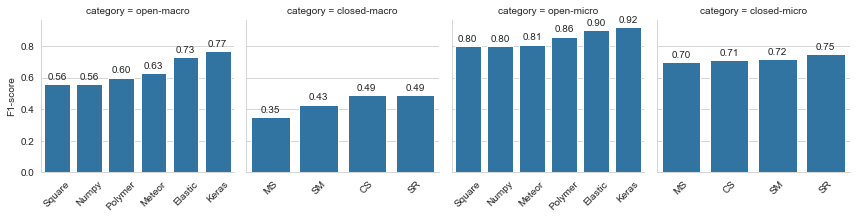

In [234]:
#Across project SentiCr Performance evaluation
import seaborn as sns
import pandas as pd
data = pd.DataFrame({
    'name': ["Square", 'Numpy',"Polymer","Meteor","Elastic","Keras","MS","SM","CS","SR","Square","Numpy","Meteor","Polymer","Elastic","Keras","MS","CS","SM","SR" ],
    'F1-score': [0.56, 0.56, 0.60,0.63,0.73,0.77,0.35,0.43,0.49,0.49,0.80,0.80,0.81,0.86,0.90,0.92,0.70,0.71,0.72,0.75],
    'category': ['open-macro', 'open-macro', 'open-macro','open-macro','open-macro', 'open-macro', 'closed-macro','closed-macro','closed-macro','closed-macro','open-micro', 'open-micro', 'open-micro','open-micro','open-micro', 'open-micro','closed-micro','closed-micro','closed-micro','closed-micro']
})
g = sns.FacetGrid(data,col='category',sharex=False,col_wrap=4)
g.map_dataframe(sns.barplot,'name','F1-score')
g.set_axis_labels(None)
g.set_xticklabels(rotation=45)
g.set_xlabels("")

for ax in g.axes.flatten():
    # Iterate over the bars
    for p in ax.containers:
        # Iterate over the patches within each bar
        for q in p.patches:
            # Add the value label
            ax.annotate(format(q.get_height(), '.2f'),
                        (q.get_x() + q.get_width() / 2., q.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 7),
                        textcoords = 'offset points')

In [154]:
#Cross project SentiCr Performance evaluation
import pandas as pd
macro_f1 = [0.56, 0.73, 0.63, 0.60, 0.77, 0.56, 0.49, 0.43, 0.35, 0.49]
micro_f1 = [0.80, 0.90, 0.81, 0.86, 0.92, 0.80, 0.71, 0.72, 0.70, 0.75]
type = ["open-source", "open-source", "open-source", "open-source", "open-source", "open-source", "closed-source",
        "closed-source", "closed-source", "closed-source"]
df = pd.DataFrame(columns=['Macro-average-F1', "Micro-average-F1", 'Domain'])
df["F1-score"] = macro_f1
# df["F1-score"] = micro_f1
df.Domain = type

Text(0.5, 0, '')

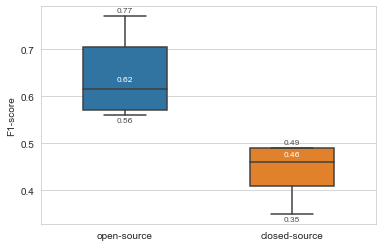

In [160]:
#Cross project SentiCr Performance evaluation open source Micro Average
import seaborn as sns
# sns.set_style("whitegrid")
ax = sns.boxplot(x="Domain", y="F1-score", data=df, width=0.5)
df1 = df.groupby('Domain')['F1-score'].agg(Min='min', Median='median', Max='max')
# medians = df.groupby(['Domain'])['Micro-average-F1'].median().values
medians = [0.62, 0.46]
mins=[0.56,0.35]
maxs=[0.77,0.49]

# medians = [0.84, 0.72]
# mins=[0.80,0.70]
# maxs=[0.92,0.75]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
  ax.annotate(str(medians[tick]), xy=(pos[tick], medians[tick]), xytext=(0, 5), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='w', size='small')
  ax.annotate(str(mins[tick]), xy=(pos[tick], mins[tick]), xytext=(0, -8), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
  ax.annotate(str(maxs[tick]), xy=(pos[tick], maxs[tick]), xytext=(0, 3), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
ax.set_xlabel(None)

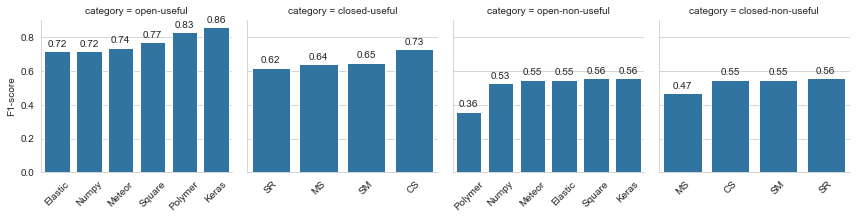

In [161]:
#Across project CRA-model  F1 evaluation
import seaborn as sns
import pandas as pd
data = pd.DataFrame({
    'name': ["Elastic", 'Numpy',"Meteor","Square","Polymer","Keras","SR","MS","SM","CS","Polymer","Numpy","Meteor","Elastic","Square","Keras","MS","CS","SM","SR" ],
    'F1-score': [0.72, 0.72, 0.74,0.77,0.83,0.86,0.62,0.64,0.65,0.73,0.36,0.53,0.55,0.55,0.56,0.56,0.47,0.55,0.55,0.56],
    'category': ['open-useful', 'open-useful', 'open-useful','open-useful','open-useful', 'open-useful', 'closed-useful','closed-useful','closed-useful','closed-useful','open-non-useful', 'open-non-useful', 'open-non-useful','open-non-useful','open-non-useful', 'open-non-useful','closed-non-useful','closed-non-useful','closed-non-useful','closed-non-useful']
})
g = sns.FacetGrid(data,col='category',sharex=False,col_wrap=4)
g.map_dataframe(sns.barplot,'name','F1-score')
g.set_axis_labels(None)
g.set_xticklabels(rotation=45)
g.set_xlabels("")

for ax in g.axes.flatten():
    # Iterate over the bars
    for p in ax.containers:
        # Iterate over the patches within each bar
        for q in p.patches:
            # Add the value label
            ax.annotate(format(q.get_height(), '.2f'),
                        (q.get_x() + q.get_width() / 2., q.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 7),
                        textcoords = 'offset points')

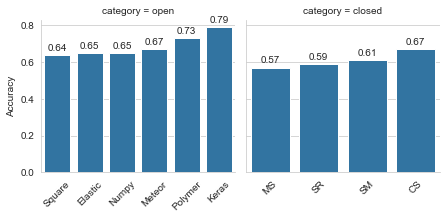

In [201]:
#Across project CRA-model  Accuracy evaluation
import seaborn as sns
import pandas as pd
data = pd.DataFrame({
    'name': ["Square","Elastic", 'Numpy',"Meteor","Polymer","Keras","MS","SR","SM","CS"],
    'Accuracy': [0.64,0.65,0.65,0.67,0.73,0.79,0.57,0.59,0.61,0.67],
    'category': ['open', 'open', 'open','open','open', 'open', 'closed','closed','closed','closed']
})
g = sns.FacetGrid(data,col='category',sharex=False,col_wrap=4)
g.map_dataframe(sns.barplot,'name','Accuracy')
g.set_axis_labels(None)
g.set_xticklabels(rotation=45)
g.set_xlabels("")

for ax in g.axes.flatten():
    # Iterate over the bars
    for p in ax.containers:
        # Iterate over the patches within each bar
        for q in p.patches:
            # Add the value label
            ax.annotate(format(q.get_height(), '.2f'),
                        (q.get_x() + q.get_width() / 2., q.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 7),
                        textcoords = 'offset points')

In [181]:
#Cross project CRA-model F1 evaluation
import pandas as pd
useful_f1 = [0.72, 0.72, 0.74,0.77,0.83,0.86,0.62,0.64,0.65,0.73]
non_useful_f1 = [0.36,0.53,0.55,0.55,0.56,0.56,0.47,0.55,0.55,0.56]
type = ["open-source", "open-source", "open-source", "open-source", "open-source", "open-source", "closed-source",
        "closed-source", "closed-source", "closed-source"]
df = pd.DataFrame(columns=['Macro-average-F1', "Micro-average-F1", 'Domain'])
# df["F1-score"] = useful_f1
df["F1-score"] = non_useful_f1
df.Domain = type

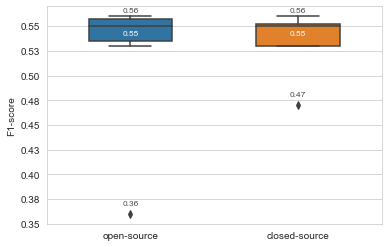

In [190]:
#Cross project CRA-model Performance evaluation open source Micro Average
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
# sns.set_style("whitegrid")
ax = sns.boxplot(x="Domain", y="F1-score", data=df, width=0.5)
df1 = df.groupby('Domain')['F1-score'].agg(Min='min', Median='median', Max='max')
# df1=df.groupby('Domain')['F1-score'].aggregate(['min','max', 'median'])
# medians = [0.76, 0.65]
# mins=[0.72,0.62]
# maxs=[0.86,0.73]

medians = [0.55, 0.55]
mins=[0.36,0.47]
maxs=[0.56,0.56]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
  ax.annotate(str(medians[tick]), xy=(pos[tick], medians[tick]), xytext=(0, -10), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='w', size='small')
  ax.annotate(str(mins[tick]), xy=(pos[tick], mins[tick]), xytext=(0, 8), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
  ax.annotate(str(maxs[tick]), xy=(pos[tick], maxs[tick]), xytext=(0, 3), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

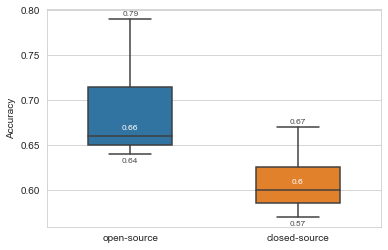

In [200]:
#Cross project CRA-model Accuracy evaluation
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
Accuracy = [0.64,0.65,0.65,0.67,0.73,0.79,0.57,0.59,0.61,0.67]
type = ["open-source", "open-source", "open-source", "open-source", "open-source", "open-source", "closed-source",
        "closed-source", "closed-source", "closed-source"]
df = pd.DataFrame(columns=['Macro-average-F1', "Micro-average-F1", 'Domain'])
df["Accuracy"] = Accuracy
df.Domain = type
# sns.set_style("whitegrid")
ax = sns.boxplot(x="Domain", y="Accuracy", data=df, width=0.5)
# df1 = df.groupby('Domain')['F1-score'].agg(Min='min', Median='median', Max='max')
mins=[0.64,0.57]
medians = [0.66, 0.60]
maxs=[0.79,0.67]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
  ax.annotate(str(medians[tick]), xy=(pos[tick], medians[tick]), xytext=(0, 5), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='w', size='small')
  ax.annotate(str(mins[tick]), xy=(pos[tick], mins[tick]), xytext=(0, -10), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
  ax.annotate(str(maxs[tick]), xy=(pos[tick], maxs[tick]), xytext=(0, 3), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

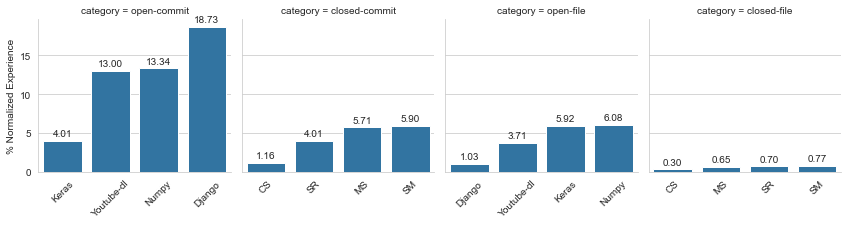

In [202]:
#Reviewing Experience difference across projects
import seaborn as sns
import pandas as pd
data = pd.DataFrame({
    'name': ["Keras", 'Youtube-dl',"Numpy","Django","CS","SR","MS","SM","Django","Youtube-dl","Keras","Numpy","CS","MS","SR","SM" ],
    '% Normalized Experience': [4.01,13.0,13.34,18.73,1.16,4.01,5.71,5.9,1.03,3.71,5.92,6.08,0.3,0.65,0.70,0.77],
    'category': ['open-commit', 'open-commit', 'open-commit','open-commit', 'closed-commit','closed-commit','closed-commit','closed-commit','open-file', 'open-file', 'open-file','open-file','closed-file','closed-file','closed-file','closed-file']
})
g = sns.FacetGrid(data,col='category',sharex=False,col_wrap=4)
g.map_dataframe(sns.barplot,'name','% Normalized Experience')
g.set_axis_labels(None)
g.set_xticklabels(rotation=45)
g.set_xlabels("")

for ax in g.axes.flatten():
    # Iterate over the bars
    for p in ax.containers:
        # Iterate over the patches within each bar
        for q in p.patches:
            # Add the value label
            ax.annotate(format(q.get_height(), '.2f'),
                        (q.get_x() + q.get_width() / 2., q.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 7),
                        textcoords = 'offset points')


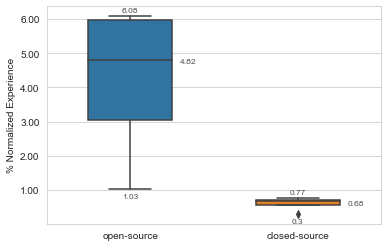

In [233]:
#Cross project Experience difference
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
commit_level = [4.01,13.0,13.34,18.73,1.16,4.01,5.71,5.9]
file_level=[1.03,3.71,5.92,6.08,0.3,0.65,0.70,0.77]
type = ["open-source", "open-source", "open-source", "open-source", "closed-source",
        "closed-source", "closed-source", "closed-source"]
df = pd.DataFrame()
df["% Normalized Experience"] = file_level
# df["file_level"]=file_level
df["type"] = type
# sns.set_style("whitegrid")
ax = sns.boxplot(x="type", y="% Normalized Experience", data=df, width=0.5)
# df1 = df.groupby('Domain')['F1-score'].agg(Min='min', Median='median', Max='max')
# mins=[4.01,1.16]
# medians = [13.17,4.86]
# maxs=[18.73,5.90]
mins=[1.03,0.30]
medians = [4.82,0.68]
maxs=[6.08,0.77]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
  ax.annotate(str(medians[tick]), xy=(pos[tick], medians[tick]), xytext=(50, -5), textcoords='offset points', ha='left',va='bottom', fontweight="light", color='.3', size='small')
  ax.annotate(str(mins[tick]), xy=(pos[tick], mins[tick]), xytext=(0, -10), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
  ax.annotate(str(maxs[tick]), xy=(pos[tick], maxs[tick]), xytext=(0, 3), textcoords='offset points', ha='center',va='bottom', fontweight="light", color='.3', size='small')
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [213]:
df1 = df.groupby('type')['% Normalized Experience'].agg(Min='min', Median='median', Max='max')
df1

,Min,Median,Max
type,,,
closed-source,0.30,0.675,0.77
open-source,1.03,4.815,6.08


Text(0, 0.5, 'F1-score')

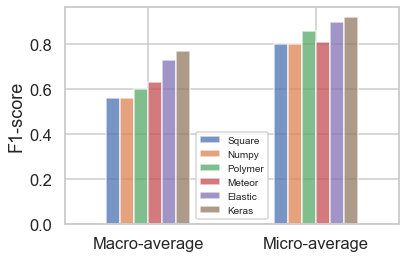

In [179]:
#Across project SentiCr Performance evaluation open-source
df = pd.DataFrame({
"Square":[0.56,0.80],
  "Numpy":[0.56,0.80],
  "Polymer":[0.60,0.86],
  "Meteor":[0.63,0.81],
  "Elastic":[0.73,0.90],
  "Keras":[0.77,0.92]
}, index=["Macro-average", "Micro-average"])
ax=df.plot(kind='bar',grid=True,alpha=0.75, rot=0)
ax.legend(fontsize=10)
ax.set_ylabel("F1-score")

Text(0, 0.5, 'F1-score')

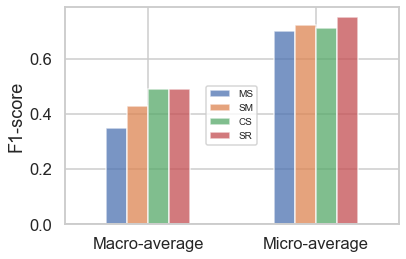

In [183]:
#Across project SentiCr Performance evaluation Closed source
df = pd.DataFrame({
"MS":[0.35,0.70],
  "SM":[0.43,0.72],
  "CS":[0.49,0.71],
  "SR":[0.49,0.75],
}, index=["Macro-average", "Micro-average"])
ax=df.plot(kind='bar',grid=True,alpha=0.75, rot=0)
ax.legend(fontsize=10,loc="center")
ax.set_ylabel("F1-score")

In [44]:
def Bar_Plot(df):
  sns.set_style("whitegrid")
  ax=df.plot(kind='bar',grid=True,alpha=0.75, rot=0)
  ax.legend(fontsize=10)
  ax.set_ylabel("F1-score")

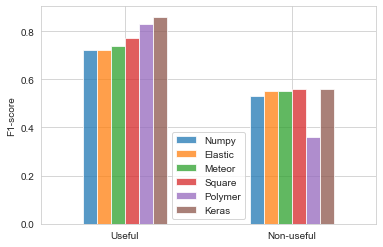

In [46]:
#Across project CRA-model Performance evaluation open-source
import pandas as pd
import seaborn as sns
df_open = pd.DataFrame({
  "Numpy":[0.72,0.53],
  "Elastic":[0.72,0.55],
  "Meteor":[0.74,0.55],
  "Square":[0.77,0.56],
  "Polymer":[0.83,0.36],
  "Keras":[0.86,0.56]
}, index=["Useful","Non-useful"])
df_closed = pd.DataFrame({
  "SR":[0.62,0.56],
  "Elastic":[0.64,0.47],
  "Meteor":[0.74,0.55],
  "Square":[0.77,0.56],
  "Polymer":[0.83,0.36],
  "Keras":[0.86,0.56]
}, index=["Useful","Non-useful"])
Bar_Plot(df_open)